### Imports:

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

In [79]:
day_data = pd.read_csv("dataverse_files\day_approach_maskedID_timeseries.csv",
dtype={'nr. sessions': 'category',
'nr. sessions.1': 'category',
'nr. sessions.2': 'category',
'nr. sessions.3': 'category',
'nr. sessions.4': 'category',
'nr. sessions.5': 'category',
'nr. sessions.6': 'category',
'strength training': 'category',
'strength training.1': 'category',
'strength training.2': 'category',
'strength training.3': 'category',
'strength training.4': 'category',
'strength training.5': 'category',
'strength training.6': 'category',
'injury': 'category'})
day_data.head()

categorical_features = ['nr.sessions','strength training']

In [80]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42766 entries, 0 to 42765
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   nr. sessions                 42766 non-null  float64 
 1   total km                     42766 non-null  float64 
 2   km Z3-4                      42766 non-null  float64 
 3   km Z5-T1-T2                  42766 non-null  float64 
 4   km sprinting                 42766 non-null  float64 
 5   strength training            42766 non-null  category
 6   hours alternative            42766 non-null  float64 
 7   perceived exertion           42766 non-null  float64 
 8   perceived trainingSuccess    42766 non-null  float64 
 9   perceived recovery           42766 non-null  float64 
 10  nr. sessions.1               42766 non-null  float64 
 11  total km.1                   42766 non-null  float64 
 12  km Z3-4.1                    42766 non-null  float64 
 13  k

In [81]:
pvalues = {}

for suffix in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:
    col = "nr. sessions" + suffix
    combination_counts = day_data.value_counts(subset=["injury", col]).unstack(level=0).fillna(0)
    chi2, p, _, _ = stats.chi2_contingency(combination_counts)
    pvalues[col] = p

In [82]:
for suffix in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:
    col = "total km" + suffix
    samples_by_group = []
    for value in set(day_data["injury"]):
        mask = day_data["injury"] == value
        samples_by_group.append(day_data[col][mask])
    stat, p = stats.kruskal(*samples_by_group)
    pvalues[col] = p


In [83]:
for suffix in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:
    col = "km Z3-4" + suffix
    samples_by_group = []
    for value in set(day_data["injury"]):
        mask = day_data["injury"] == value
        samples_by_group.append(day_data[col][mask])
    stat, p = stats.kruskal(*samples_by_group)
    pvalues[col] = p

In [84]:
for suffix in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:
    col = "km Z5-T1-T2" + suffix
    samples_by_group = []
    for value in set(day_data["injury"]):
        mask = day_data["injury"] == value
        samples_by_group.append(day_data[col][mask])
    stat, p = stats.kruskal(*samples_by_group)
    pvalues[col] = p


In [69]:
for suffix in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:
    col = "km sprinting" + suffix
    samples_by_group = []
    for value in set(day_data["injury"]):
        mask = day_data["injury"] == value
        samples_by_group.append(day_data[col][mask])
    stat, p = stats.kruskal(*samples_by_group)
    pvalues[col] = p

In [70]:
for suffix in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:
    col = "strength training" + suffix
    combination_counts = day_data.value_counts(subset=["injury", col]).unstack(level=0).fillna(0)
    chi2, p, _, _ = stats.chi2_contingency(combination_counts)
    pvalues[col] = p

In [71]:
for suffix in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:
    col = "hours alternative" + suffix
    samples_by_group = []
    for value in set(day_data["injury"]):
        mask = day_data["injury"] == value
        samples_by_group.append(day_data[col][mask])
    stat, p = stats.kruskal(*samples_by_group)
    pvalues[col] = p

In [72]:
# Only uses days where training occured
temp_df = day_data[day_data["perceived exertion"] != -.01]

for suffix in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:
    col = "perceived exertion" + suffix
    samples_by_group = []
    for value in set(day_data["injury"]):
        mask = day_data["injury"] == value
        samples_by_group.append(day_data[col][mask])
    stat, p = stats.kruskal(*samples_by_group)
    pvalues[col] = p

In [73]:
for suffix in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:
    col = "perceived trainingSuccess" + suffix
    samples_by_group = []
    for value in set(day_data["injury"]):
        mask = day_data["injury"] == value
        samples_by_group.append(day_data[col][mask])
    stat, p = stats.kruskal(*samples_by_group)
    pvalues[col] = p

In [74]:
for suffix in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:
    col = "perceived recovery" + suffix
    samples_by_group = []
    for value in set(day_data["injury"]):
        mask = day_data["injury"] == value
        samples_by_group.append(day_data[col][mask])
    stat, p = stats.kruskal(*samples_by_group)
    pvalues[col] = p

In [75]:
pvalues = dict(sorted(pvalues.items(), key=lambda item: item[1], reverse=True))

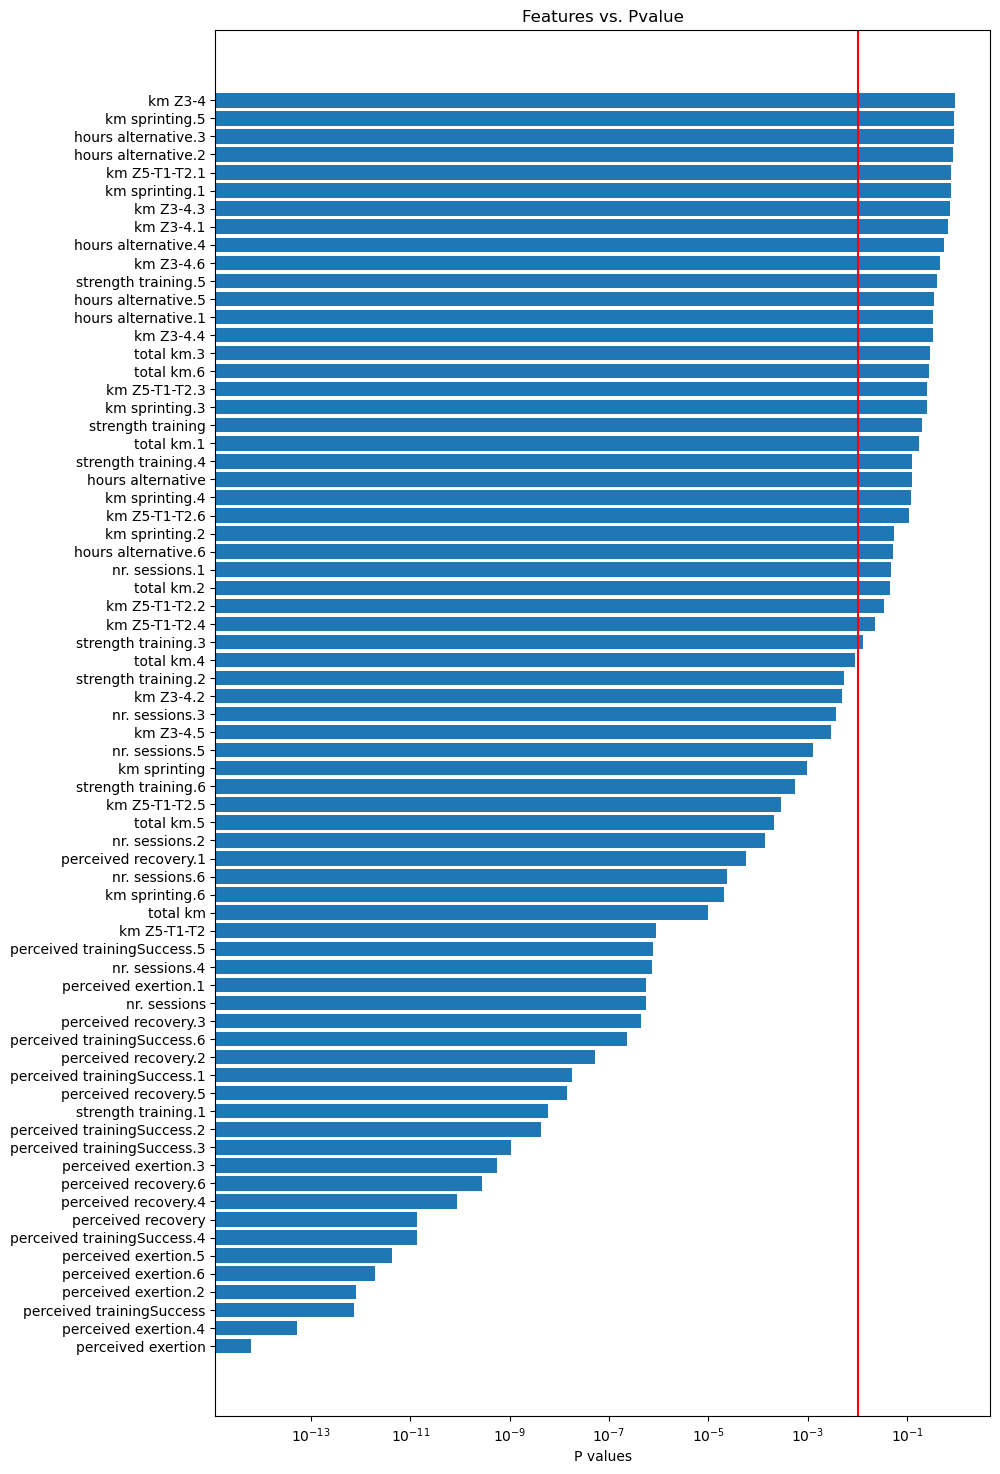

In [76]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
features = pvalues.keys()
y_pos = np.arange(len(features))

ax.barh(y_pos, pvalues.values(), align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(features)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('P values')
ax.set_title('Features vs. Pvalue')
ax.set_xscale('log')
fig.set_size_inches(10, 18)

plt.axvline(x=0.01, c='r')

In [77]:
stat_sig_features = []
for feat, pvalue in pvalues.items():
    if pvalue < .01:
        stat_sig_features.append(feat)


sig_features = day_data[stat_sig_features]



---
Plotting the most predictive features:

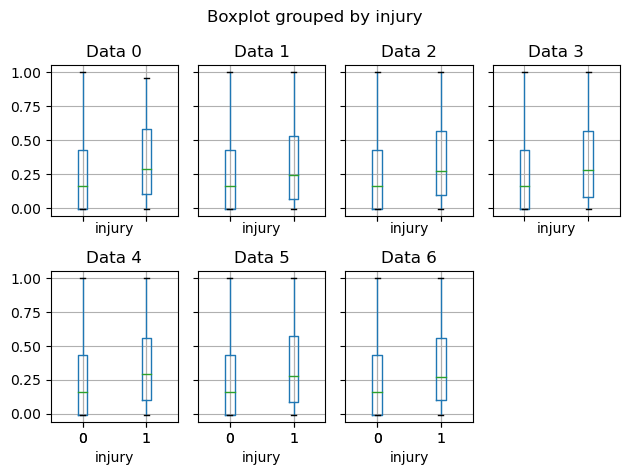

In [102]:
fig, ax = plt.subplots(2, 4, sharex='col', sharey='row')
i = 0
for suffix in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:
    col = "perceived exertion" + suffix
    day_data.boxplot(column=col, by='injury', ax=ax.flatten()[i])
    ax.flatten()[i].title.set_text(f'Data {i}')
    i = i + 1

ax[1,3].axis('off')
plt.tight_layout()

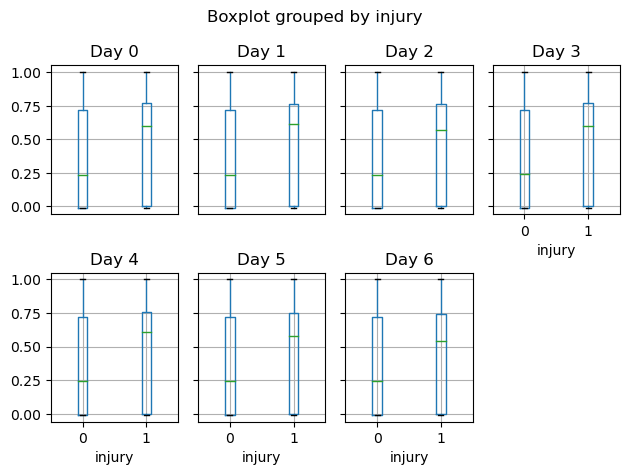

In [116]:
fig, ax = plt.subplots(2, 4, sharey='row')
i = 0
for suffix in ["", ".1", ".2", ".3", ".4", ".5", ".6"]:
    col = "perceived trainingSuccess" + suffix
    day_data.boxplot(column=col, by='injury', ax=ax.flatten()[i])
    ax.flatten()[i].title.set_text(f'Day {i}')
    i = i + 1

ax[1,3].axis('off')
ax[0,0].set_xticks([])
ax[0,1].set_xticks([])
ax[0,2].set_xticks([])
ax[0,0].set_xlabel("")
ax[0,1].set_xlabel("")
ax[0,2].set_xlabel("")

plt.tight_layout()

---
### Using SVD to plot the two most predictive Components:

In [56]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(sig_features)

In [58]:
svd = TruncatedSVD(n_components=10, random_state=17)
svd_matrix = svd.fit_transform(scaled_features)
svd_matrix.shape

(42766, 10)

Text(0.5, 1.0, '% data explained vs. Component Index #')

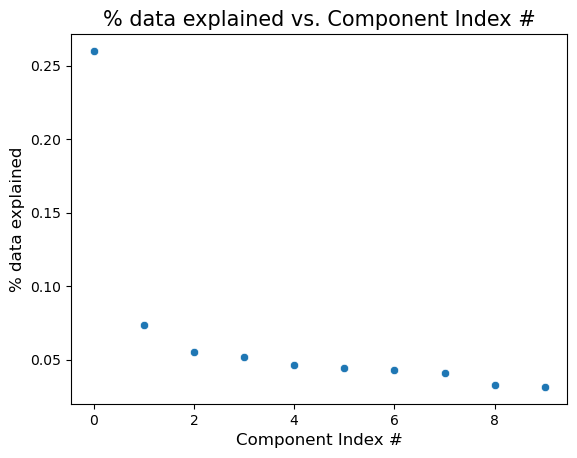

In [59]:
sns.scatterplot(x=range(0,10), y=svd.explained_variance_ratio_)
plt.ylabel('% data explained', fontsize=12)
plt.xlabel('Component Index #', fontsize=12)
plt.title('% data explained vs. Component Index #', fontsize=15)

Text(0.5, 1.0, '2nd vs. 1st Highest Explained Variance Components')

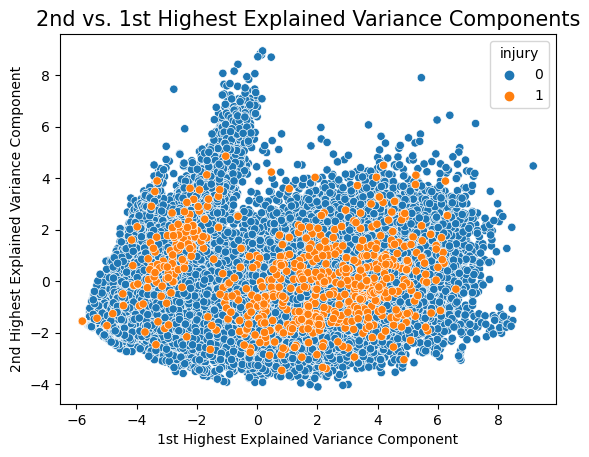

In [61]:
sns.scatterplot(x=svd_matrix[:,0], y=svd_matrix[:,1], hue=day_data['injury'])
plt.ylabel('2nd Highest Explained Variance Component', fontsize=10)
plt.xlabel('1st Highest Explained Variance Component', fontsize=10)
plt.title('2nd vs. 1st Highest Explained Variance Components', fontsize=15)